In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [13]:
df = pd.read_csv(r'/tested.csv')

In [14]:
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


In [15]:
df.shape

(418, 12)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
df = df.drop(columns ='Cabin' , axis=1)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [21]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [26]:
df['Fare'].fillna(df['Fare'].mean(),inplace = True)

In [27]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [28]:
print(df['Embarked'].mode()[0])

S


In [29]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)

In [30]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**DATA ANALYSIS**

In [31]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [32]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [37]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

**DATA VISUALIZATION**

<Axes: xlabel='Survived', ylabel='count'>

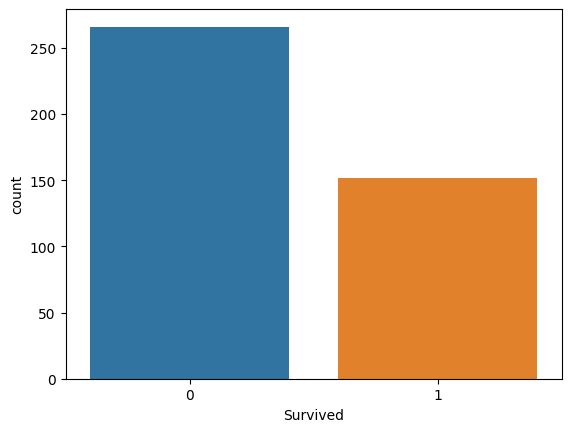

In [34]:
sns.countplot(x='Survived' , data=df)

<Axes: xlabel='Survived', ylabel='count'>

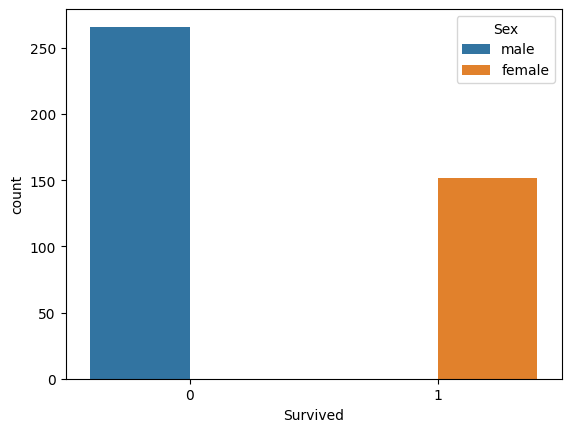

In [35]:
sns.countplot(x='Survived',data=df,hue='Sex')

<Axes: xlabel='Sex', ylabel='count'>

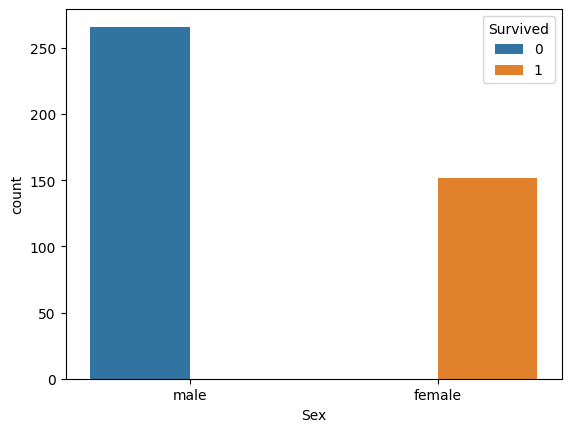

In [40]:
sns.countplot(x='Sex', hue='Survived' , data=df)

<Axes: xlabel='Pclass', ylabel='count'>

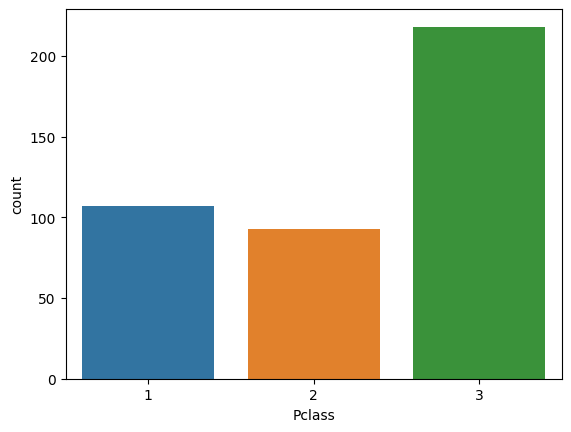

In [41]:
sns.countplot(x='Pclass', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

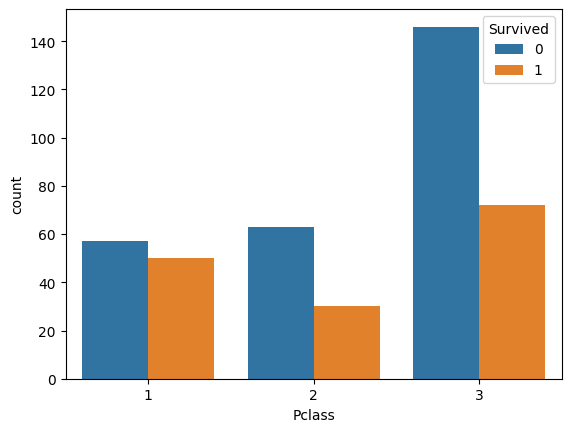

In [43]:
sns.countplot(x='Pclass',hue='Survived', data=df)

**ENCODING CATEGORICAL COLUMNS**

In [44]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [45]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [46]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}} , inplace = True)

In [47]:
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0
5,897,0,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,0
6,898,1,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,2
7,899,0,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,0


In [49]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'] ,axis = 1)
Y = df['Survived']

In [50]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [51]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


**SPLITTING THE DATA INTO TRAINING DATA AND TEST DATA**

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.4 , random_state=2)

In [53]:
print(X.shape, X_train.shape , X_test.shape)

(418, 7) (250, 7) (168, 7)


**MODEL TRAINING**

In [54]:
model = LogisticRegression()

In [55]:
model.fit(X_train,Y_train)

LogisticRegression()

**ACCURACY SCORE**

In [56]:
X_train_prediction = model.predict(X_train)

In [57]:
print(X_train_prediction)

[0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1
 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1]


In [58]:
training_data_accuracy = accuracy_score(Y_train , X_train_prediction)
print('Accuracy score of training data :',training_data_accuracy)

Accuracy score of training data : 1.0


In [59]:
X_test_prediction = model.predict(X_test)


In [60]:
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0]


In [62]:
test_data_accuracy = accuracy_score(Y_test , X_test_prediction)
print('Accuracy score of test data :',test_data_accuracy)

Accuracy score of test data : 1.0
